## Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

## Importing the libraries

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#to view more columns and rows in the dataset.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading the data

In [5]:
#read the application_data dataset given.
app = pd.read_csv('application_data.csv')

In [6]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
app.shape

(307511, 122)

In [8]:
app.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
#checking missing values in columns of application_data.
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#procedure of removal of columns having missing values >40%.
nullPer = list((app.isnull().sum()*100)/len(app))

In [11]:
flag = 0
counter = []
for i in nullPer:
    if i < 40:
        counter.append(flag)
    flag = flag + 1

In [12]:
columns = []
for i in counter:
    columns.append(list(app.columns)[i])
app = app[columns]

In [13]:
#updated number of rows and columns in inp0.
app.shape

(307511, 73)

In [14]:
#checking other missing values columns.
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

## Data Imbalance

In [15]:
100*app["TARGET"].value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

##### According to the ratio, 92% of clients are non-defaulters and 8% of clients are defaulters.

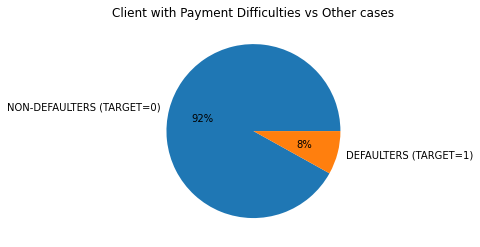

In [16]:
#pie chart for data imbalance ratio
plt.pie(100*app["TARGET"].value_counts(normalize=True), labels=['NON-DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'],autopct='%1.f%%')
plt.title("Client with Payment Difficulties vs Other cases")
plt.show()

In [17]:
#Ratio
Nondefault = app.loc[app["TARGET"]==0]
Default = app.loc[app["TARGET"]==1]

In [18]:
round(len(app[app.TARGET==0]) / len(app[app.TARGET==1]),2)

11.39

### Handling other missing values in the filtered data

##### Handling AMT_ANNUITY column.

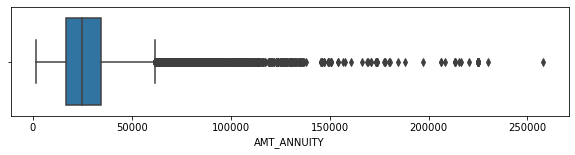

In [19]:
#checking for AMT_ANNUITY column. (continuous variable)
plt.figure(figsize=(10,2))
sns.boxplot(app.AMT_ANNUITY)
plt.show()

In [20]:
#Since there are presence of outliers we can impute the AMT_ANNUITY column using median value.
median1 = app.AMT_ANNUITY.median()
median1

24903.0

In [21]:
app.AMT_ANNUITY.fillna(median1, inplace=True)
app.AMT_ANNUITY.isnull().sum()

0

##### Handling AMT_GOODS_PRICE column.

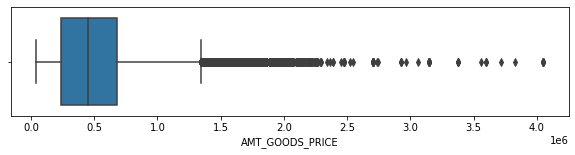

In [22]:
#checking for the AMT_GOODS_PRICE column. (continuous variable)
plt.figure(figsize=(10,2))
sns.boxplot(app.AMT_GOODS_PRICE)
plt.show()

In [23]:
#Since there are presence of outliers we can impute the AMT_GOODS_PRICE column using median value.
median2 = app.AMT_GOODS_PRICE.median()
median2

450000.0

In [24]:
app.AMT_GOODS_PRICE.fillna(median2, inplace=True)
app.AMT_GOODS_PRICE.isnull().sum()

0

##### Handling NAME_TYPE_SUITE column.

In [25]:
#checking for NAME_TYPE_SUITE column. (categorical column)
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
#Since this is a categorical column we can impute the NAME_TYPE_SUITE column using mode.
mode1 = app.NAME_TYPE_SUITE.mode()[0]
mode1

'Unaccompanied'

In [27]:
app.NAME_TYPE_SUITE.fillna(mode1, inplace=True)
app.NAME_TYPE_SUITE.isnull().sum()

0

In [28]:
#checking after imputation.
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### Handling OCCUPATION_TYPE column.

In [29]:
#checking for OCCUPATION_TYPE column. (categorical column)
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
#Since this is a categorical column we can impute the OCCUPATION_TYPE column using mode.
mode2 = app.OCCUPATION_TYPE.mode()[0]
mode2

'Laborers'

In [31]:
app.OCCUPATION_TYPE.fillna(mode2, inplace=True)
app.OCCUPATION_TYPE.isnull().sum()

0

In [32]:
#checking after imputation.
app.OCCUPATION_TYPE.value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

##### Handling CNT_FAM_MEMBERS column.

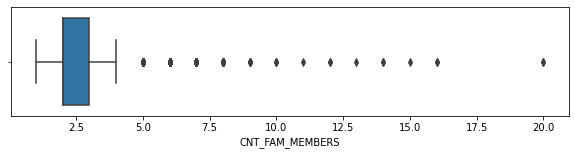

In [33]:
#checking for the CNT_FAM_MEMBERS column. (continuous variable)
plt.figure(figsize=(10,2))
sns.boxplot(app.CNT_FAM_MEMBERS)
plt.show()

In [34]:
#Since there are presence of outliers we can impute the CNT_FAM_MEMBERS column using median value.
median3 = app.CNT_FAM_MEMBERS.median()
median3

2.0

In [35]:
app.CNT_FAM_MEMBERS.fillna(median3, inplace=True)
app.CNT_FAM_MEMBERS.isnull().sum()

0

##### Handling other columns.

In [36]:
#Assuming that the nulls in these columns are due to non inquiry -  AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR.
#Imputing using 0.0 value
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [37]:
#checking remaining null value columns.
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [38]:
#imputing some more columns using 0.0 value.
app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']] = app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].fillna(value=0.0)

In [39]:
#imputing null value of DAYS_LAST_PHONE_CHANGE column with mode. 
app.DAYS_LAST_PHONE_CHANGE.mode()[0]

0.0

In [40]:
app.DAYS_LAST_PHONE_CHANGE = app.DAYS_LAST_PHONE_CHANGE.fillna(app.DAYS_LAST_PHONE_CHANGE.mode()[0])

In [41]:
#checking nulls
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [42]:
#Since EXT_SOURCE_3 column has a higher number of nulls we prefer to drop it.
app = app.drop(columns = ["EXT_SOURCE_3"])

In [43]:
#Since EXT_SOURCE_2 column has a higher number of nulls we prefer to drop it.
app = app.drop(columns = ["EXT_SOURCE_2"])

In [44]:
#checking null values again.
app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [45]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [46]:
#converting CNT_FAM_MEMBERS column to int.
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].astype('int64')

In [47]:
#the remaining columns of app.
columns

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [48]:
#dropping flag documents columns as there is no clear idea of what documents are involved.
flagcols = []
for i in columns:
    if i.startswith('FLAG_DOCUMENT'):
        flagcols.append(i)

In [49]:
app.drop(columns=flagcols,axis=1,inplace=True)

In [50]:
app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [51]:
#dropping columns mentioning social circle as it seems irrelevant to the analysis.
app.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'], inplace=True)

In [52]:
app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

#### Checking value counts of columns.

In [53]:
#Loan type - NAME_CONTRACT_TYPE column.
app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [54]:
#Gender column.
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
#XNA value does not signify anything relevant so we can replace it with the mode.
gen=app.CODE_GENDER.mode()[0]
gen

'F'

In [56]:
#Replacing XNA with F.
app["CODE_GENDER"].replace({"XNA": "F"}, inplace=True)

In [57]:
app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [58]:
#client owns a car or not.
app.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [59]:
#client owns a house or flat
app.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [60]:
#Creating Age Column based on Days_Birth
app['Age'] = abs(round((app['DAYS_BIRTH'].replace('-',''))/365,2)).astype('int64')

In [61]:
#Creating age buckets
app['Age_Bucket'] = pd.cut(x=app.Age, bins=[20, 30, 40, 50, 60, 70], labels=['20 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70'])

In [62]:
#convert the days employed to years and apply absolute function as its in negative form
app['Working_Years'] = abs(round((app['DAYS_EMPLOYED'].replace('-',''))/365,2)).astype('int64')

In [63]:
app['Working_Years'].value_counts(normalize=True)

1000    0.180072
1       0.103541
2       0.096390
0       0.090572
3       0.081626
4       0.070814
5       0.052961
6       0.048922
7       0.042805
8       0.037238
9       0.029183
10      0.023970
11      0.019199
12      0.017277
14      0.015125
13      0.014130
15      0.008891
16      0.007577
17      0.006536
18      0.006231
19      0.006084
20      0.005210
21      0.004754
22      0.004071
23      0.003314
24      0.002976
25      0.002670
27      0.002133
26      0.002124
28      0.001980
29      0.001847
30      0.001489
31      0.001418
34      0.001187
32      0.001141
33      0.001076
35      0.000832
36      0.000637
37      0.000452
39      0.000406
38      0.000377
40      0.000192
41      0.000192
42      0.000137
44      0.000098
43      0.000062
45      0.000049
48      0.000013
46      0.000013
47      0.000003
49      0.000003
Name: Working_Years, dtype: float64

In [64]:
#As in above value count, we can observe an outlier referring that a person has worked 1000 years which is not possible.
#Lets replace it with 1.
app['Working_Years'] = app['Working_Years'].replace(1000,1)

In [65]:
#checking after replacement.
app['Working_Years'].value_counts(normalize=True)

1     0.283613
2     0.096390
0     0.090572
3     0.081626
4     0.070814
5     0.052961
6     0.048922
7     0.042805
8     0.037238
9     0.029183
10    0.023970
11    0.019199
12    0.017277
14    0.015125
13    0.014130
15    0.008891
16    0.007577
17    0.006536
18    0.006231
19    0.006084
20    0.005210
21    0.004754
22    0.004071
23    0.003314
24    0.002976
25    0.002670
27    0.002133
26    0.002124
28    0.001980
29    0.001847
30    0.001489
31    0.001418
34    0.001187
32    0.001141
33    0.001076
35    0.000832
36    0.000637
37    0.000452
39    0.000406
38    0.000377
40    0.000192
41    0.000192
42    0.000137
44    0.000098
43    0.000062
45    0.000049
48    0.000013
46    0.000013
47    0.000003
49    0.000003
Name: Working_Years, dtype: float64

In [66]:
#dropping more irrelevant columns for more easy and simple analysis.
amtreq = []
for i in columns:
    if i.startswith('AMT_REQ'):
        amtreq.append(i)

In [67]:
app.drop(columns=amtreq,axis=1,inplace=True)

In [68]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Bucket,Working_Years
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,25,20 to 30,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,45,41 to 50,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,52,51 to 60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52,51 to 60,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,54,51 to 60,8


In [69]:
#we will now convert days into years and negative values to positive values.
days1 = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
app[days1] = app[days1].abs()
app[days1] = app[days1]/365
app[days1].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [70]:
#As we converted values to years, let us do it for the column names too.
app.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH', 'DAYS_EMPLOYED':'YEARS_EMPLOYED', 'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

In [71]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Bucket,Working_Years
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,25,20 to 30,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,45,41 to 50,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,52,51 to 60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52,51 to 60,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,54,51 to 60,8


In [72]:
#Dataframe split with respect to TARGET column.
Nondefault = app.loc[app["TARGET"]==0]
Default = app.loc[app["TARGET"]==1]

In [73]:
Nondefault.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Bucket,Working_Years
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,45,41 to 50,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,52,51 to 60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,52,51 to 60,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,54,51 to 60,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,13.616438,1.306849,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,46,41 to 50,4


In [74]:
Default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Bucket,Working_Years
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,25,20 to 30,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,18.008219,5.005479,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,51,51 to 60,7
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.895890,3.457534,3.238356,2.819178,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,47,41 to 50,3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.668493,9.854795,0.123288,12.079452,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,36,31 to 40,9
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67.928767,1000.665753,14.769863,11.504110,1,0,0,1,0,0,Laborers,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,67,61 to 70,1


### Univariate Analysis

In [75]:
#calculate the percentage of NAME_CONTRACT_TYPE column.
app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

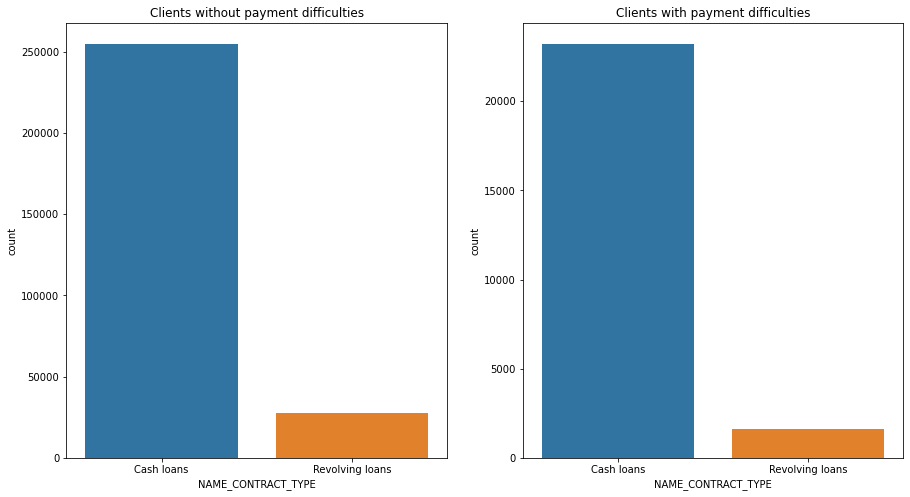

In [76]:
#plot for NAME_CONTRACT_TYPE column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['NAME_CONTRACT_TYPE'])
plt.title('Clients without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(Default['NAME_CONTRACT_TYPE'])
plt.title('Clients with payment difficulties')
plt.show()

From this above plot we can clearly say that most of the clients apply for Cash Loans than Revolving Loans.

In [77]:
#calculate the percentage of CODE_GENDER column.
app.CODE_GENDER.value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

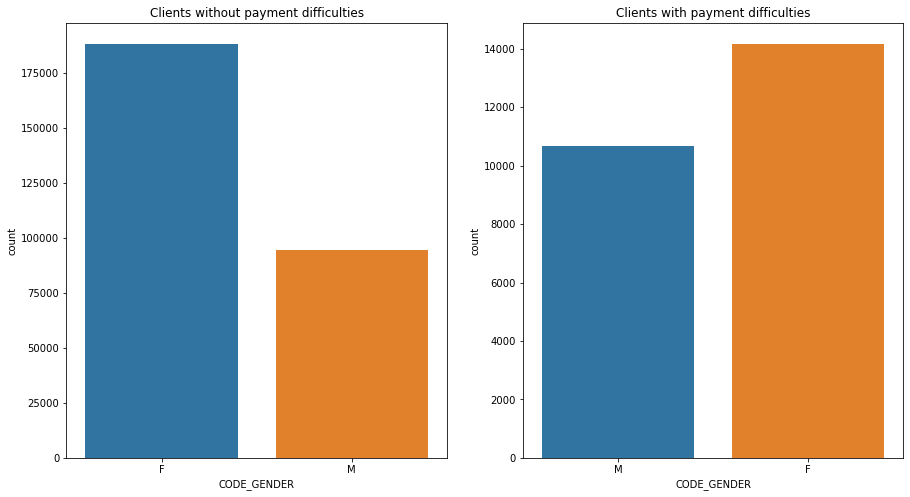

In [78]:
#plot for CODE_GENDER column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['CODE_GENDER'])
plt.title('Clients without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(Default['CODE_GENDER'])
plt.title('Clients with payment difficulties')
plt.show()

From the above plotting we observe that the Female clients are ones who apply loans the most as they are almost equal in both cases.

In [79]:
#calculate the percentage of NAME_INCOME_TYPE column.
app.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

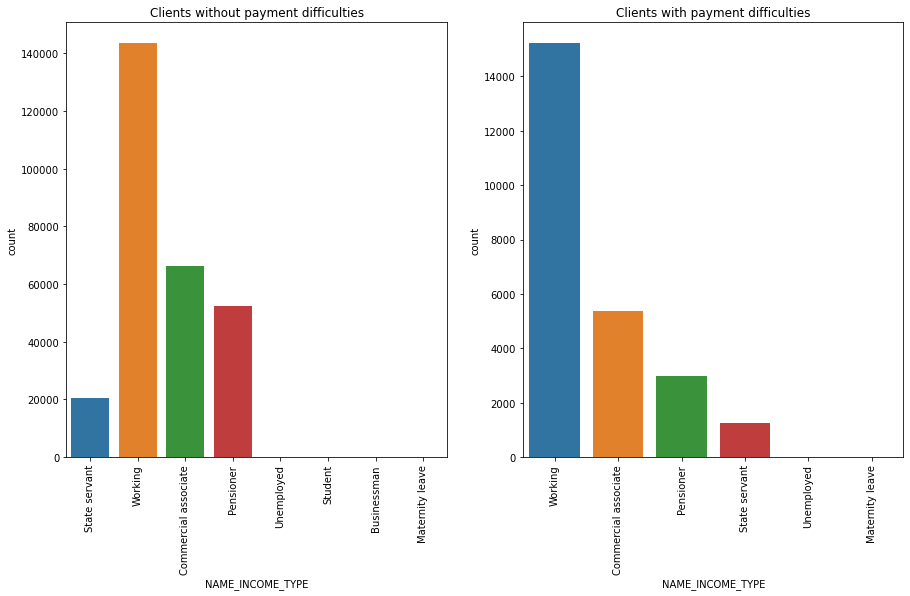

In [80]:
#plot for NAME_INCOME_TYPE column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['NAME_INCOME_TYPE'])
plt.title('Clients without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(Default['NAME_INCOME_TYPE'])
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

From the above analysis we can figure out that the Working People are the ones who are likely to default than other categories

In [81]:
#calculate percentage of NAME_EDUCATION_TYPE column.
app.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

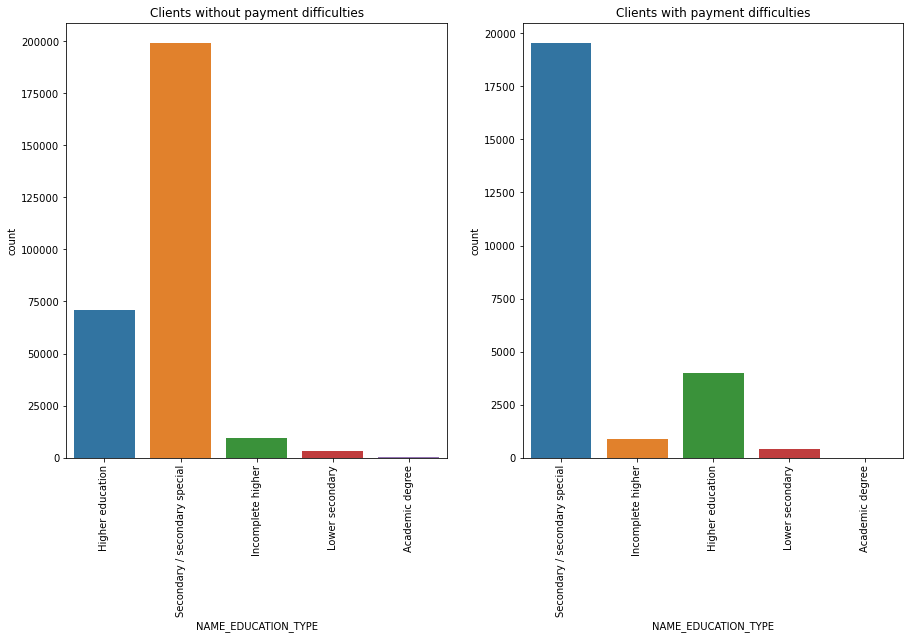

In [82]:
#plot for NAME_EDUCATION_TYPE column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['NAME_EDUCATION_TYPE'])
plt.title('Clients without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(Default['NAME_EDUCATION_TYPE'])
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

The clients with Secondary / Secondary special education level are most likely to default the loan.

In [83]:
#calculate the percentage of NAME_FAMILY_STATUS column.
app.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

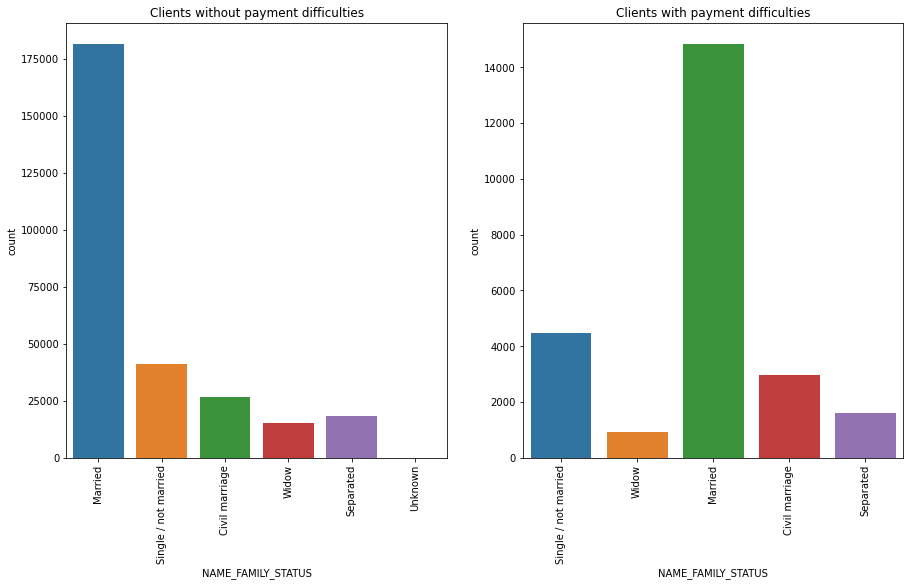

In [84]:
#plot for NAME_FAMILY_STATUS column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['NAME_FAMILY_STATUS'])
plt.title('Clients without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(Default['NAME_FAMILY_STATUS'])
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Married clients are most likely to default.

In [85]:
#percentage of NAME_HOUSING_TYPE column.
app.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

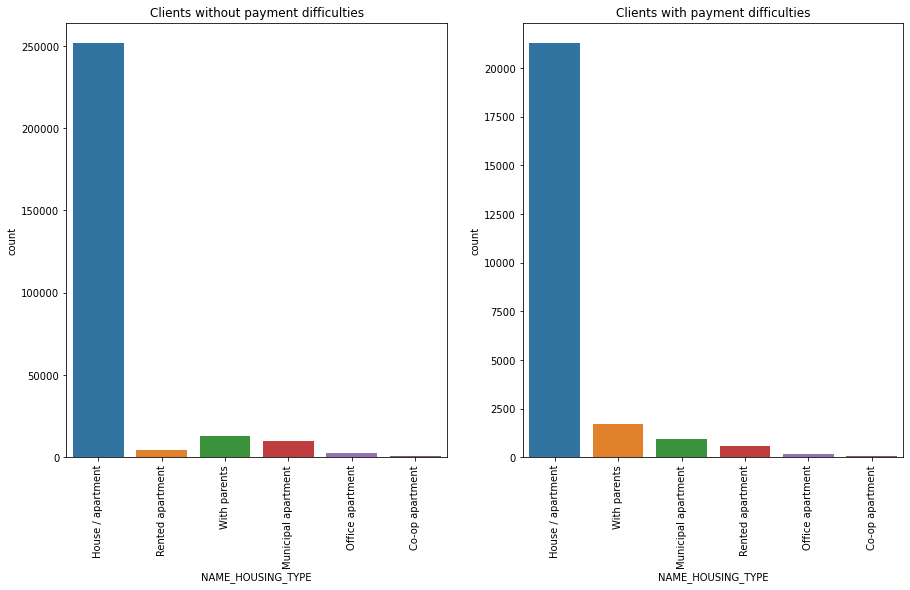

In [86]:
#plot for NAME_HOUSING_TYPE column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['NAME_HOUSING_TYPE'])
plt.title('Clients without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(Default['NAME_HOUSING_TYPE'])
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Clients living in a House/Apartment are more likely to take loan and also have possibility of defaulting than other categories.

In [87]:
#percentage of OCCUPATION_TYPE column.
app.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.492916
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

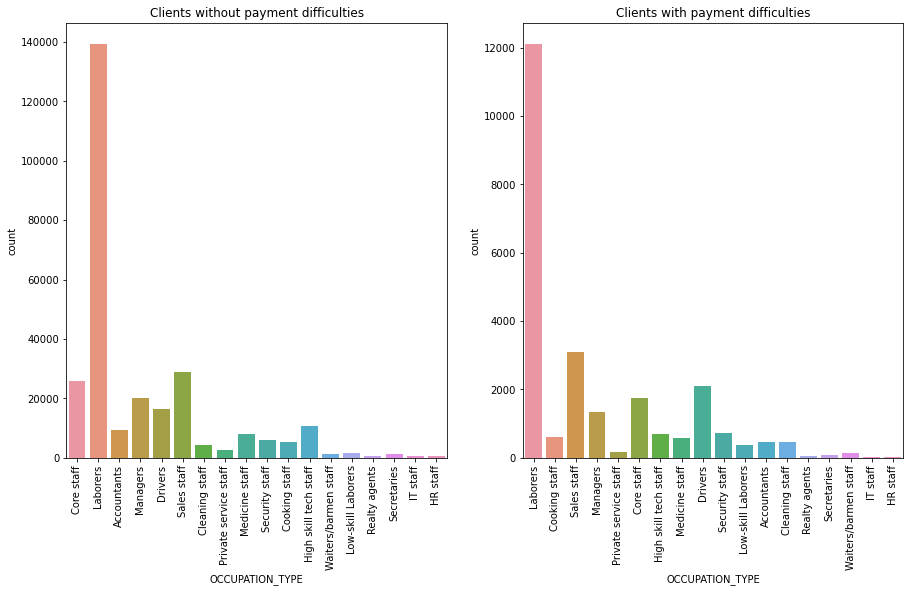

In [88]:
#plot for OCCUPATION_TYPE columns.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(Nondefault['OCCUPATION_TYPE'])
plt.title('Clients without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(Default['OCCUPATION_TYPE'])
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

Labourers have more payment difficulties than other categories.

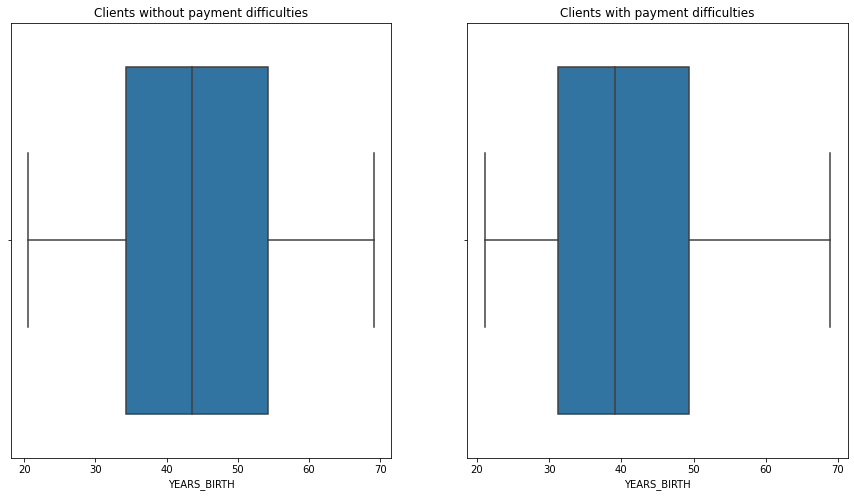

In [89]:
#plot for YEARS_BIRTH column.
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(Nondefault['YEARS_BIRTH'])
plt.title('Clients without payment difficulties')

plt.subplot(1,2,2)
sns.boxplot(Default['YEARS_BIRTH'])
plt.title('Clients with payment difficulties')
plt.show()

Clients within the age group between 30 and 50 are the ones with payment difficulties.

### Bivariate / Multivariate Analysis

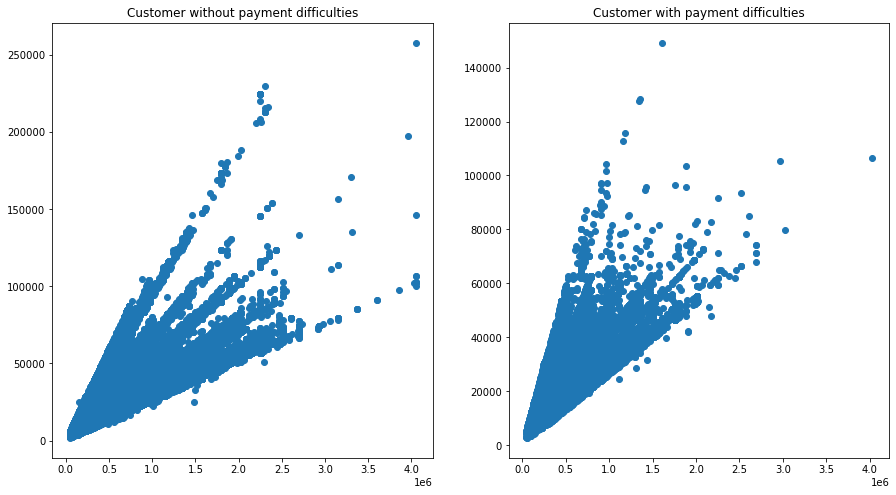

In [90]:
#plotting for AMT_CREDIT and AMT_GOODS_PRICE columns.
plt.figure(figsize=(15,8)) 

plt.subplot(1,2,1)
plt.scatter(Nondefault.AMT_CREDIT, Nondefault.AMT_ANNUITY)
plt.title('Customer without payment difficulties')


plt.subplot(1,2,2)
plt.scatter(Default.AMT_CREDIT, Default.AMT_ANNUITY)
plt.title('Customer with payment difficulties')

plt.show()

The credit amount of the loan increases in correlation with the price of the consumer goods.

In [91]:
#heat map of NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS
res = pd.pivot_table(data=Nondefault, index="NAME_EDUCATION_TYPE", columns="NAME_FAMILY_STATUS", values="AMT_CREDIT")
res/100000

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_EDUCATION_TYPE,,,,,,
Academic degree,9.584584,7.221799,7.423903,6.292369,NaN,7.069140
Higher education,6.413640,7.356446,6.500960,5.850872,5.85,5.819566
Incomplete higher,5.258697,6.313920,5.526281,4.691022,NaN,5.050939
Lower secondary,4.249437,5.431980,4.846584,4.066894,6.75,3.951998
Secondary / secondary special,5.209420,6.166852,5.189117,4.790360,NaN,4.747421


In [92]:
ses = pd.pivot_table(data=Default, index="NAME_EDUCATION_TYPE", columns="NAME_FAMILY_STATUS", values="AMT_CREDIT")
ses/100000

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_EDUCATION_TYPE,,,,,
Academic degree,NaN,10.299532,NaN,7.908300,NaN
Higher education,6.001934,6.826229,6.432740,5.624853,6.076735
Incomplete higher,5.005774,5.859610,5.601294,4.563215,5.566565
Lower secondary,4.680546,5.303975,4.243134,3.760449,4.663241
Secondary / secondary special,4.910489,5.810946,5.042267,4.633415,5.130649


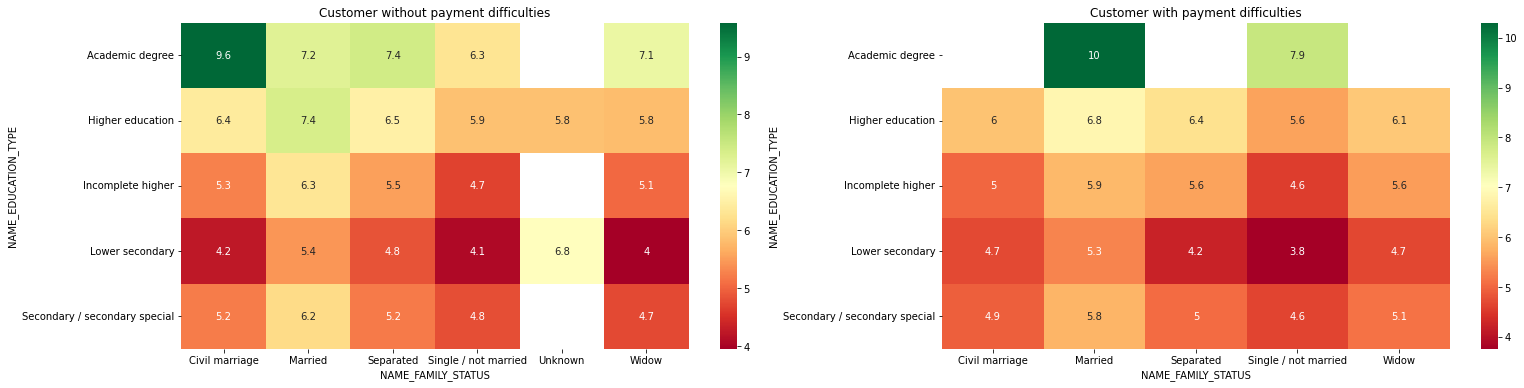

In [93]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
sns.heatmap(res/100000, annot=True, cmap='RdYlGn')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.heatmap(ses/100000, annot=True, cmap='RdYlGn')
plt.title('Customer with payment difficulties')
plt.show()

Married clients with Academic degree are more likely to take a higher Credit Amount.

#### Correlation

In [180]:
ncor = Nondefault.corr()

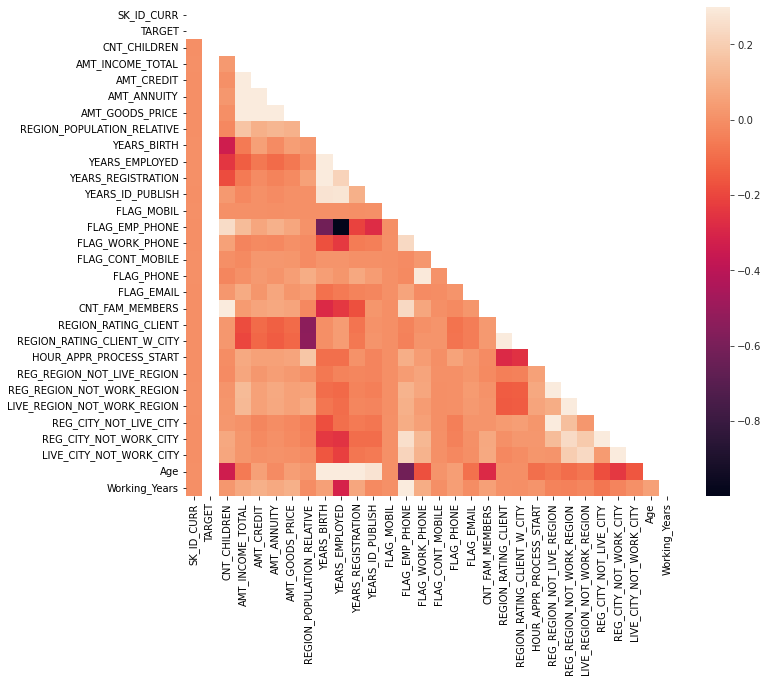

In [181]:
mask = np.zeros_like(ncor)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(ncor, mask=mask, vmax = 0.3, square = True);

In [187]:
ntop10 = Nondefault.corr().abs()
ntop10 = ntop10.unstack().sort_values(kind = 'quicksort')
ntop10 = ntop10.dropna()
ntop10 = ntop10[ntop10 != 1.0]
print(ntop10.tail(10))

CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
Age                          YEARS_BIRTH                    0.999711
YEARS_BIRTH                  Age                            0.999711
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999756
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999756
dtype: float64


In [94]:
cor = Default.corr()

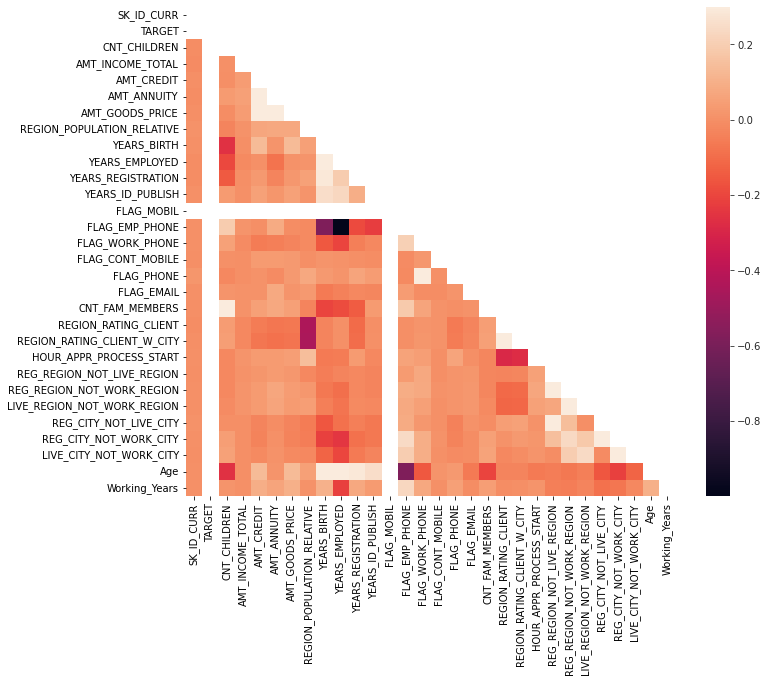

In [95]:
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(cor, mask=mask, vmax = 0.3, square = True);

In [96]:
top10 = Default.corr().abs()
top10 = top10.unstack().sort_values(kind = 'quicksort')
top10 = top10.dropna()
top10 = top10[top10 != 1.0]
print(top10.tail(10))

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
YEARS_BIRTH                  Age                            0.999691
Age                          YEARS_BIRTH                    0.999691
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999705
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999705
dtype: float64


Above are the top 10 correlations for the dataframe of client with payment difficulties.

### Reading and basic checking of previous_application.

In [97]:
#read the previous_application dataset.
pre = pd.read_csv('previous_application.csv')

In [98]:
#basic checks.
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
pre.shape

(1670214, 37)

In [100]:
pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [101]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [104]:
#checking null values.
pre.isnull().sum()/len(pre)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [109]:
#dropping null value columns.
nullpre = list((pre.isnull().sum()*100)/len(pre))

In [110]:
f = 0
c = []
for i in nullpre:
    if i < 40:
        c.append(f)
    f = f + 1

In [112]:
columns = []
for i in c:
    columns.append(list(pre.columns)[i])
pre = pre[columns]

In [113]:
#checking nulls after dropping null columns>=40%.
pre.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [118]:
#monitoring the object types.
pre.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [119]:
#Since the number of XNA values are low we can replace them with mode for smooth analysis.
pre.NAME_CONTRACT_TYPE.mode()[0]

'Cash loans'

In [122]:
pre.NAME_CONTRACT_TYPE = pre.NAME_CONTRACT_TYPE.replace('XNA', pre.NAME_CONTRACT_TYPE.mode()[0])

In [123]:
pre.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [124]:
for c in pre.select_dtypes('object').columns:
    print(pre[c].value_counts(normalize=True)*100)

Cash loans         44.778633
Consumer loans     43.656142
Revolving loans    11.565225
Name: NAME_CONTRACT_TYPE, dtype: float64
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
Y    99.49258
N     0.50742
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment

In [125]:
#lets deal with columns having XNA values, by either dropping the columns or by replacing the XNA values.

In [127]:
#NAME_CASH_LOAN_PURPOSE column.
pre.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [128]:
#Since the above column has higher percentage of XAP & XNA values, it may hamper the analysis, so we drop the column.
pre.drop(columns=['NAME_CASH_LOAN_PURPOSE'], inplace=True)

In [129]:
#NAME_PAYMENT_TYPE column.
pre.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [130]:
#Since the above column has higher percentage of XNA values, it may hamper the analysis, so we drop the column.
pre.drop(columns=['NAME_PAYMENT_TYPE'], inplace=True)

In [132]:
#CODE_REJECT_REASON column.
pre.CODE_REJECT_REASON.value_counts(normalize=True)*100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [133]:
#Since XAP is of higher percentage, it may hamper the analysis, so we drop the column.
pre.drop(columns=['CODE_REJECT_REASON'], inplace=True)

In [134]:
#NAME_CLIENT_TYPE column.
pre.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [135]:
#Since XNA is low we can replace it with mode value of the column.
pre.NAME_CLIENT_TYPE.mode()[0]

'Repeater'

In [136]:
pre.NAME_CLIENT_TYPE = pre.NAME_CLIENT_TYPE.replace('XNA', pre.NAME_CLIENT_TYPE.mode()[0])

In [137]:
pre.NAME_CLIENT_TYPE.value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [138]:
#Likewise we can identify columns with higher number of XNA and/or XAP values and drop them.
pre.drop(['NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'], axis = 1, inplace=True)

In [139]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CONTRACT_STATUS         1670214 non-null  object 
 12  DAYS_DECISION                1670214 non-n

#### Now lets proceed to merge the two dataframes app and pre to perform analysis.

In [140]:
#merging the application_data with previous application data
cred = pd.merge(left=app, right=pre, how='inner', on='SK_ID_CURR')

In [141]:
cred.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,Age_Bucket,Working_Years,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,25,20 to 30,1,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Approved,-606,New,Stone,500,24.0,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,45,41 to 50,3,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Approved,-746,Repeater,Credit and cash offices,-1,12.0,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,45,41 to 50,3,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Approved,-828,Refreshed,Stone,1400,6.0,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,45,41 to 50,3,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Approved,-2341,Refreshed,Country-wide,200,12.0,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,52,51 to 60,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,Approved,-815,New,Regional / Local,30,4.0,POS mobile without interest


In [142]:
cred.shape

(1413701, 60)

In [145]:
cred.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

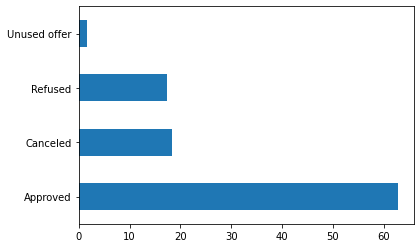

In [147]:
#Analyzing the contract status of the loan in terms of percentage.
(cred.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).plot.barh()
plt.show()

The above bar graph shows that more than 60% of the loans are approved in the previous application. The cancelled and refused status are of almost same percentage and very less amount of offers were unused.

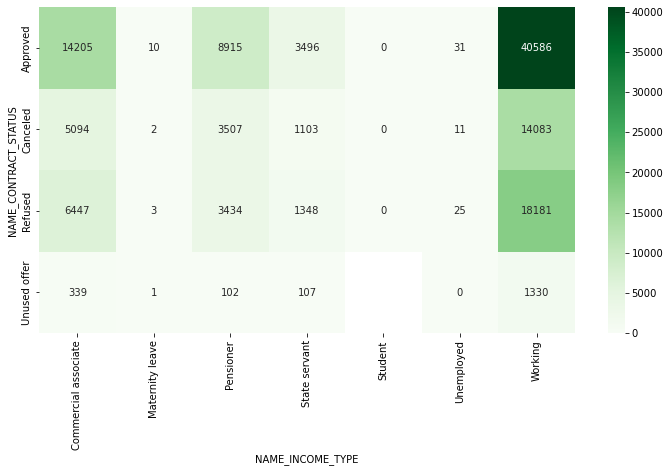

In [156]:
#NAME_CONTRACT_STATUS vs NAME_INCOME_TYPE vs Target
pes=pd.pivot_table(data=cred, index="NAME_CONTRACT_STATUS", columns="NAME_INCOME_TYPE", values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(pes, annot=True, cmap='Greens', fmt="g")
plt.show()

The highest number of defaults have been from the Working category with Approved loans compared to the other categories. Moreover 18,000+ working people have also been refused of the loan in the previous application.

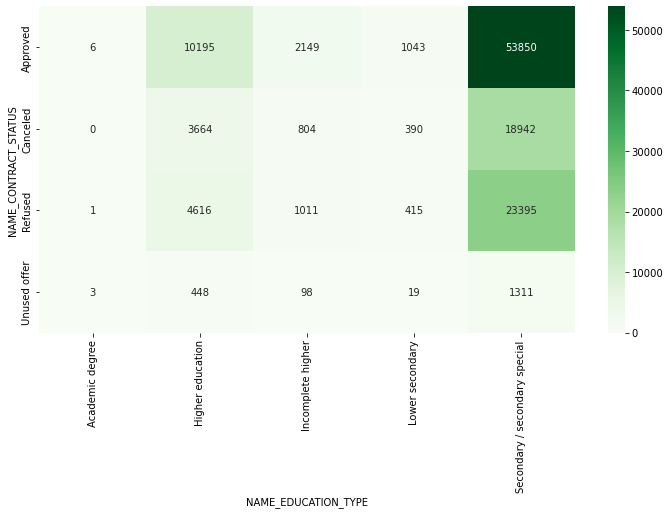

In [158]:
#NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE vs Target
qes=pd.pivot_table(data=cred, index="NAME_CONTRACT_STATUS", columns="NAME_EDUCATION_TYPE", values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(qes, annot=True, cmap='Greens', fmt="g")
plt.show()

Applicants of Secondary / Secondary special education type are more likely to default even after their loans being approved in the previous application. Around 23,000 applicants were refused and for around 19,000 applicants, loans were cancelled in the previous application. 

In [160]:
#### Dividing the data based on the Contract Status:
Approved = cred[cred['NAME_CONTRACT_STATUS'] == 'Approved']
Cancelled = cred[cred['NAME_CONTRACT_STATUS'] == 'Canceled']
Refused = cred[cred['NAME_CONTRACT_STATUS'] == 'Refused']
Unused = cred[cred['NAME_CONTRACT_STATUS'] == 'Unused offer']

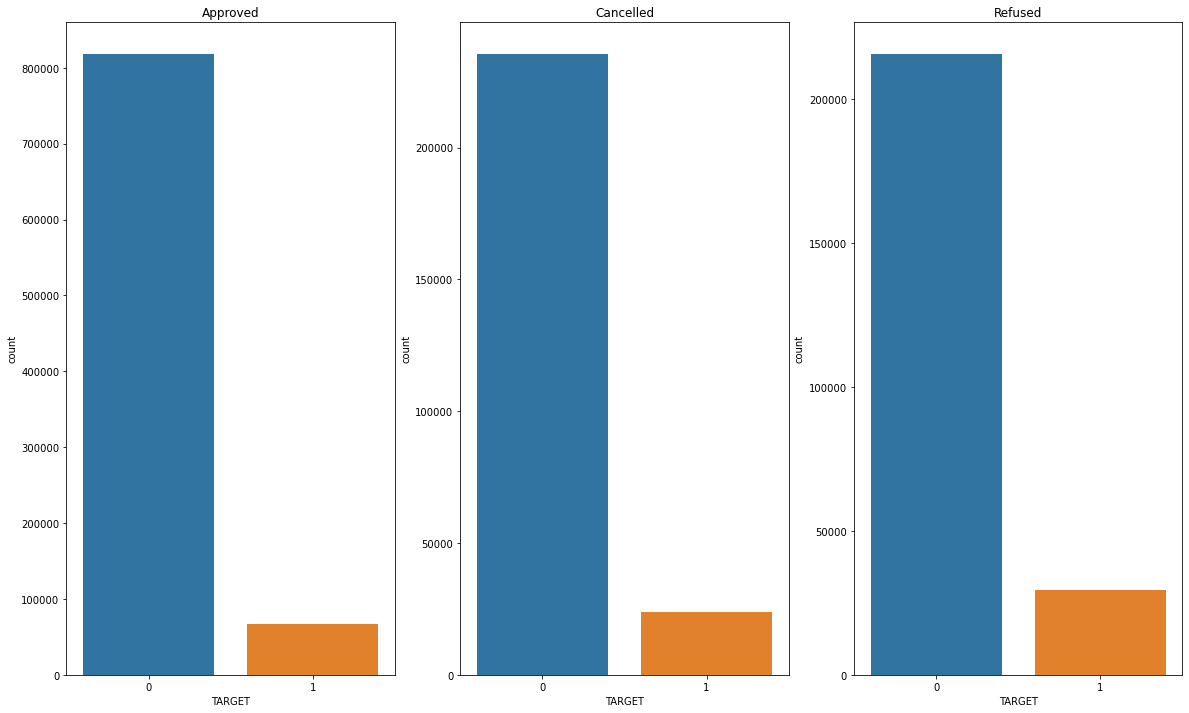

In [172]:
#TARGET comparison.
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.countplot(Approved['TARGET'])
plt.title('Approved')

plt.subplot(1,3,2)
sns.countplot(Cancelled['TARGET'])
plt.title('Cancelled')

plt.subplot(1,3,3)
sns.countplot(Refused['TARGET'])
plt.title('Refused')
plt.show()

Cancelled and Refused applications in previous application has more defaulters.

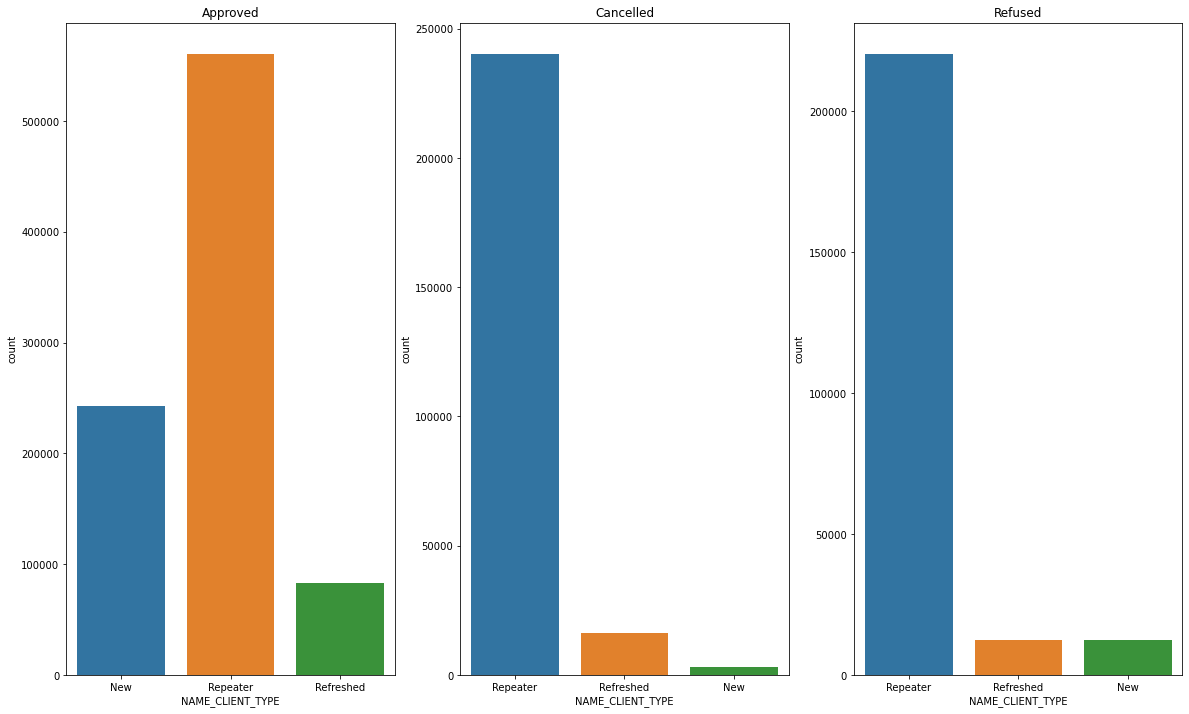

In [173]:
#NAME_CLIENT_TYPE comparison.
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.countplot(Approved['NAME_CLIENT_TYPE'])
plt.title('Approved')

plt.subplot(1,3,2)
sns.countplot(Cancelled['NAME_CLIENT_TYPE'])
plt.title('Cancelled')

plt.subplot(1,3,3)
sns.countplot(Refused['NAME_CLIENT_TYPE'])
plt.title('Refused')
plt.show()

Repeater type client has requested for more amount of loans.

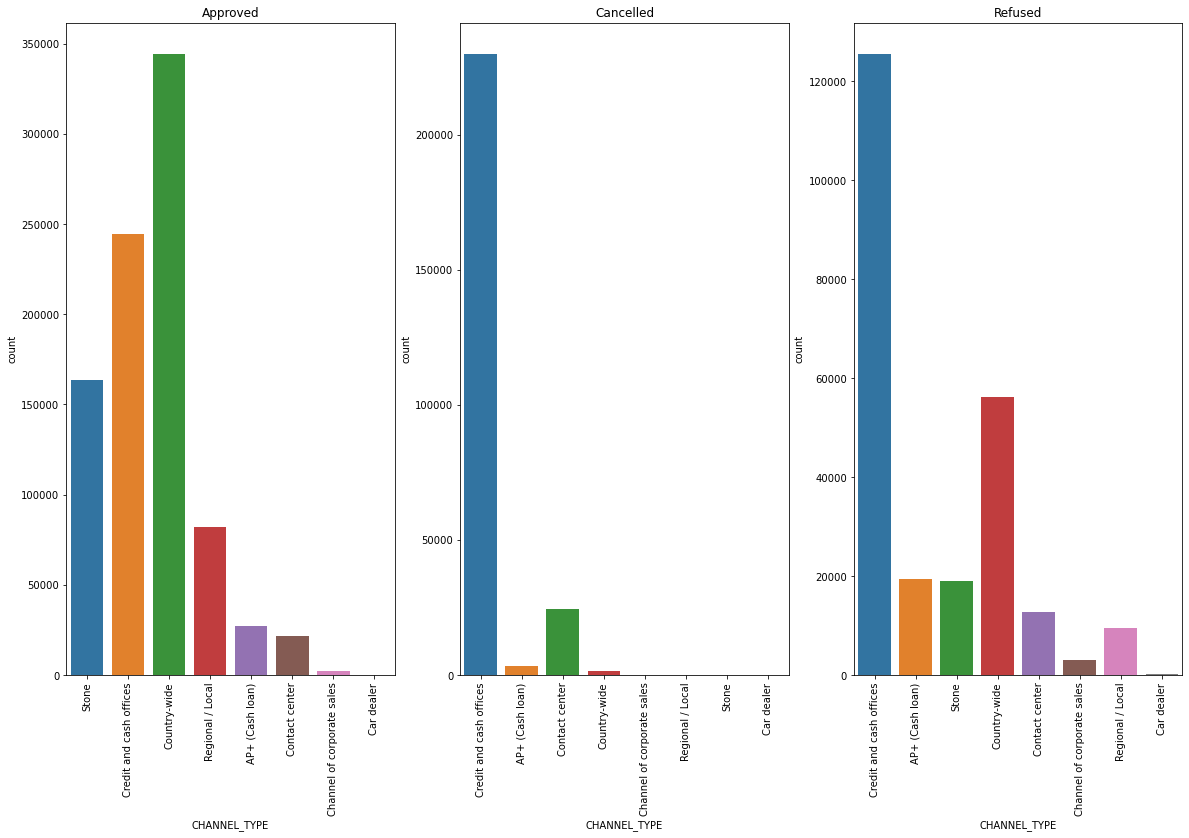

In [175]:
#CHANNEL_TYPE analysis.
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.countplot(Approved['CHANNEL_TYPE'])
plt.title('Approved')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(Cancelled['CHANNEL_TYPE'])
plt.title('Cancelled')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.countplot(Refused['CHANNEL_TYPE'])
plt.title('Refused')
plt.xticks(rotation=90)
plt.show()

More number of loans are Approved in the Country-wide channel type. The loans are refused and cancelled when it is through Cash and cash offices channel.

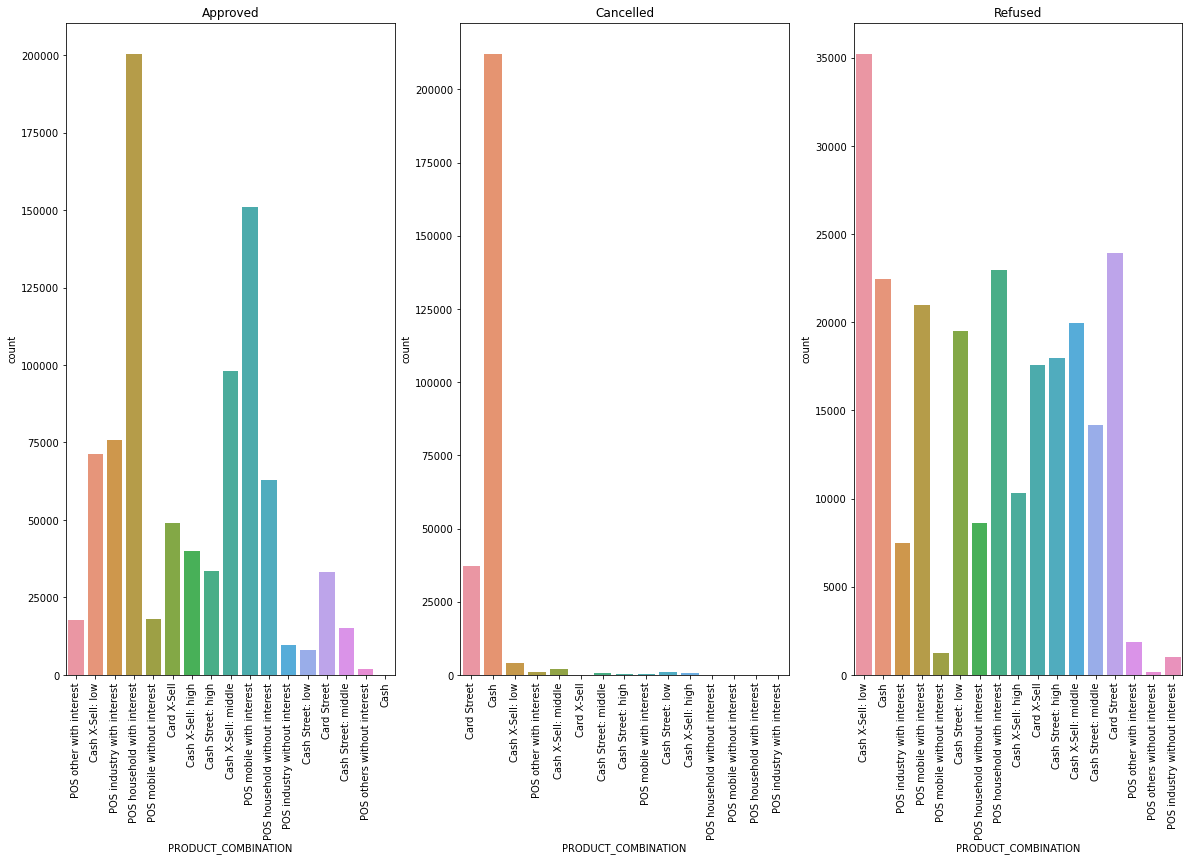

In [176]:
#PRODUCT_COMBINATION analysis.
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.countplot(Approved['PRODUCT_COMBINATION'])
plt.title('Approved')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(Cancelled['PRODUCT_COMBINATION'])
plt.title('Cancelled')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.countplot(Refused['PRODUCT_COMBINATION'])
plt.title('Refused')
plt.xticks(rotation=90)
plt.show()

POS household with interest category sees more loans Approved, and POS mobile with interest follows not far behind.
Cash category witnesses more Cancellations.
Cash X-Sell:low category are mostly refused.

### Conclusions:

Working people default in large numbers, and it is not wise to target them for loans.

Secondary / Secondary special educated applicants are also more prone to default.

People living in House/Apartments take more loans but are also prone to default the loan. So people living with parents and in Co-op apartments are more likely to pay back the loan.

Bank should focus more on Country-wide channel type as it sees more number of Approved loans. Whereas, Credit and cash offices channel type sees more number of Cancelled and Refused loans.

Cash category in Product Combination sees more Cancelled loans.